## <center>图像阈值</center>

##  1. cv2.threshold函数
在这里，问题直截了当。对于每个像素，应用相同的阈值。如果像素值小于阈值，则将其设置为0，否则将其设置为最大值。函数**cv.threshold**用于应用阈值。第一个参数是源图像，它**应该是灰度图像**。第二个参数是阈值，用于对像素值进行分类。第三个参数是分配给超过阈值的像素值的最大值。OpenCV提供了不同类型的阈值，这由函数的第四个参数给出。通过使用**cv.THRESH_BINARY**类型。所有简单的阈值类型为：

`cv2.threshold (src, thresh, maxval, type)`

Args:
- `src`:原图片，必须是单通道
- `thresh`:阈值，取值范围0~255
- `maxval`:填充色，取值范围0~255
- `type`:阈值类型

type:
| 阈值 | 小于阈值像素点 | 大于阈值的像素点 | 对应变量              |
| ---- | -------------- | ---------------- | --------------------- |
| 0    | 置0            | 置填充色         | cv2.THRESH_BINARY     |
| 1    | 置填充色       | 置0              | cv2.THRESH_BINARY_INV |
| 2    | 保持原色       | 置灰色           | cv2.THRESH_TRUNC      |
| 3    | 置0            | 保持原色         | cv2.THRESH_TOZERO     |
| 4    | 保持原色       | 置0              | cv2.THRESH_TOZERO_INV |



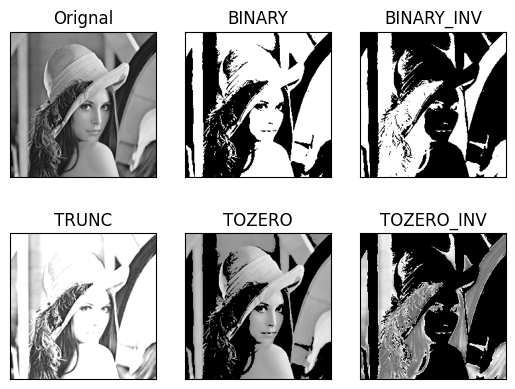

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img = cv.imread('../Lenna.png', 0)
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
titles = ['Orignal', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


##  2.cv2.adaptiveThreshold函数

在上一节中，我们使用一个全局值作为阈值。但这可能并非在所有情况下都很好，例如，如果图像在不同区域具有不同的光照条件。在这种情况下，自适应阈值阈值化可以提供帮助。在此，算法基于像素周围的小区域确定像素的阈值。因此，对于同一图像的不同区域，我们获得了不同的阈值，这为光照度变化的图像提供了更好的结果。

除了参数`输入图像img`，`通道最大值` 外，方法**cv.adaptiveThreshold**还包含三个输入参数：

- 阈值算法
  - `cv.ADAPTIVE_THRESH_MEAN_C`:阈值是邻近区域的平均值减去常数C
  - `cv.ADAPTIVE_THRESH_GAUSSIAN_C`:阈值是邻域值的高斯加权总和减去常数C.

- `BLOCKSIZE`:确定附近区域大小
- `C`:是从邻域像素的平均或加权总和中减去的一个常数

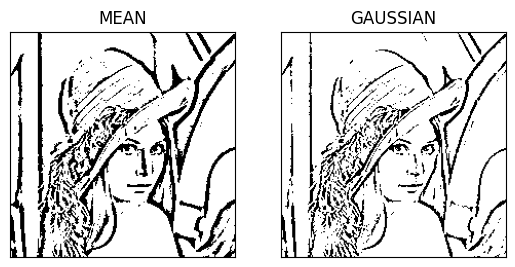

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('../Lenna.png', 0)

th1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 10)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 10)

plt.subplot(121)
plt.xticks([]), plt.yticks([]), plt.title('MEAN')
plt.imshow(th1, cmap='gray')
plt.subplot(122)
plt.xticks([]), plt.yticks([]), plt.title('GAUSSIAN')
plt.imshow(th2, cmap='gray')
